# South African Language identification hack 2023

The challenge focuses on classifying text written in South Africa's 11 Official languages. The notebook covers data exploration, preprocessing, feature extraction, model training, evaluation, and submission generation. By leveraging machine learning techniques, I aim to develop a classification model that accurately predicts the language of a given text.

# <a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

In [43]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import re
import nltk

# Import library for Feature Extraction
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Import library for train test split
from sklearn.model_selection import train_test_split

from sklearn import *
from sklearn.linear_model import *


from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from datetime import datetime, timedelta
from sklearn.neighbors import KNeighborsClassifier




# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# set plot style
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suppo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suppo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |


In [44]:
# load the data
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [45]:
# Merge the data so we can process them together

df_full = pd.concat([df_train, df_test])

In [46]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [47]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## Summary of our datasets

In [48]:
df_train.shape[0]

33000

In [49]:
df_train.shape[1]

2

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [51]:
df_train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [52]:
print(df_train['lang_id'].unique())

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']


The above displayed is a list of the language codes representing each of the 11 official South African languages. These are also class labels. For the purpose of building an accurate classification model later in this project, it is important to ensure that the class labels are balanced.

In [53]:
df_train["lang_id"].value_counts() # There are 11 languages and 3000 sentenses in each category

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

## Missing values


In [54]:
df_test.isnull().sum(axis=0)

index    0
text     0
dtype: int64

In [55]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [57]:
# Establishing if the sentenses have stop words
df_train['text'][0:5]

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

### Exploratory Data Analysis
The following section provides an overview of the given data. We looks at some key inights of the raw data where we look at sentiment distribution of the data. This has been illustrated using graphs. We also visualise word frequency of messages of the unprocessed train and test data.

In [58]:
# Let us inspect the dimensions of the data sets.
print('train dim:', df_train.shape, 'test dim:', df_train.shape)
df_train.iloc[0:2]

train dim: (33000, 2) test dim: (33000, 2)


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...


### Distribution of the Target variable

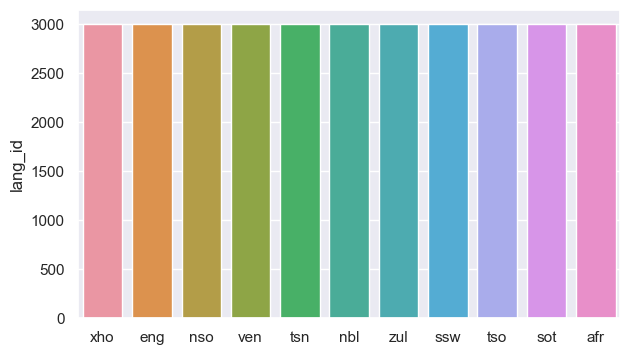

In [59]:
# Plot Class Distributions:
plt.figure(figsize=(7,4))
sns.barplot(data=df_train, x=df_train['lang_id'].unique(), y=df_train['lang_id'].value_counts())
plt.show()

The bar plot indicates that there is an even class distribution. 3000 records for each respective class.

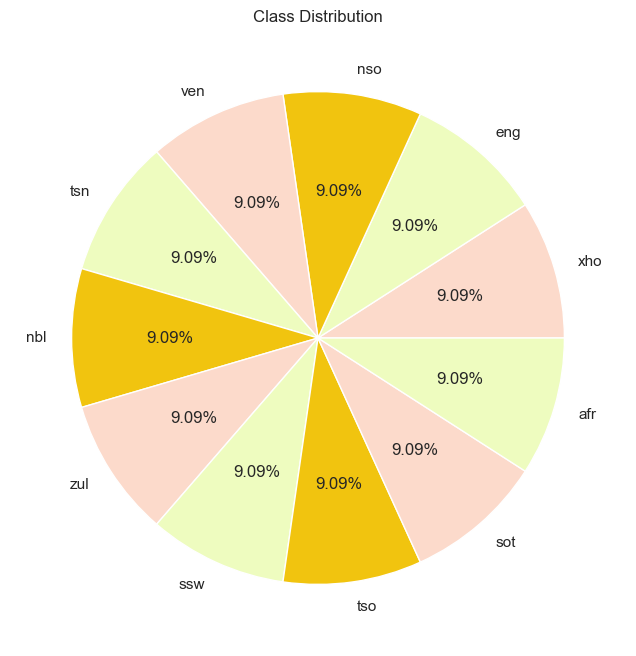

In [60]:
# Assuming df_train is your DataFrame containing the data
pie_x = df_train['lang_id'].value_counts()
labels = df_train['lang_id'].unique()

# Define custom colors
custom_colors = ['#FCDACB', '#EEFCBF', '#f1c40f']

# Set the size of the plot
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(pie_x, autopct='%0.2f%%', labels=labels, colors=custom_colors)

# Add a title
plt.title('Class Distribution')

# Show the pie chart
plt.show()


In [61]:
# Extract tweets from dataframe & creating a new dataframe with only tweets
raw_tweets = df_train['text']

# View top 5 rows of raw_tweets
raw_tweets[3010:3015]

3010    irr yi lapho i-yi imela linani lemholo wemnike...
3011    nasionale wetgewing moet raamwerke voorskryf v...
3012    satiso ngekwesigaba sichaza tigaba temarekhodi...
3013    umgcini olawula umnyangwa owamkela unyango lok...
3014    kulalela imininingwane etinhlotjeni letehluken...
Name: text, dtype: object

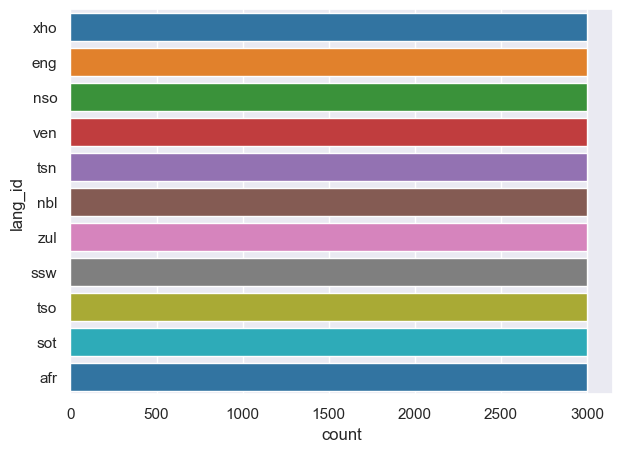

In [62]:
plt.figure(figsize=(7,5))
sns.countplot(y="lang_id",data=df_train,palette="tab10")
plt.show()

In [63]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


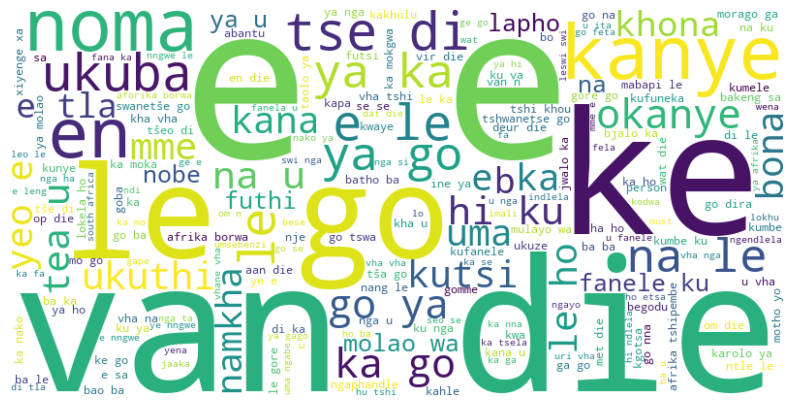

In [74]:

# Function to preprocess text
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to text column
df_train['clean_text'] = df_train['text'].apply(preprocess_text)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_train['clean_text']))

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Data Preprocessing
### Merge the train & test datasets:
This will allow us to preprocess the train & test data sets simultaneously.

In [25]:
# Merging both the data sets
combine_df = df_train.append(df_test, 
                             ignore_index=True,
                             sort=False)
combine_df.head(3)

,lang_id,text,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,NaN
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,NaN
2,eng,the province of kwazulu-natal department of tr...,NaN


In [26]:
# Combine (Merged) Data Set Information
print('Combine Data Set Info - Total Rows | Total Columns | Total Null Values')
print(combine_df.info())

Combine Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38682 entries, 0 to 38681
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lang_id  33000 non-null  object 
 1   text     38682 non-null  object 
 2   index    5682 non-null   float64
dtypes: float64(1), object(2)
memory usage: 906.7+ KB
None


# Feature Engineering

## Data Cleaning

The next step is to do some Data Engineering. The purpose of this is to ensure that the data is cleaned and prepared for the subsequent stage of modeling.

In [27]:
# Define Function to remove punctuation
import string  # Add this line to import the string module
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

In [28]:
print(english_text_df.head())  # Print the first few rows of the DataFrame to inspect its content
print(english_text_df['text'].unique())  # Print unique values in the 'text' column to check for text data


Empty DataFrame
Columns: [lang_id, text]
Index: []
[]


A new column will be created to hold the cleaned data for the subsequent data cleaning steps.

In [29]:
# Create a New Column for clean data:
df_train['clean_text'] = df_train['text'].apply(remove_punctuation)

## Word Tokenization:
NLTK provides a function called word_tokenize() for splitting strings into tokens (nominally words). It splits tokens based on white space and punctuation. For example, commas and periods are taken as separate tokens.

In [31]:
import nltk
from nltk.tokenize import TreebankWordTokenizer

# Converting text into Tokens(word-lists):
tokenizer = TreebankWordTokenizer()
df_train['clean_text'] = df_train['clean_text'].apply(tokenizer.tokenize)

# Display the DataFrame after Tokenization:
df_train.head()


,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


## Stopword Removal
These are words that occur frequently in sentences, however, they do not contribute much to the information in a sentence. By stripping away these words, the low-level information is removed from the data, allowing the focus to remain on the important information. For this task, the nltk Library's Stopword Dictionary will be used for reference.

In [32]:
# Define Function to Remove Stopwords:
def chop_stopwords(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [33]:
import nltk  # Import the nltk library
from nltk.corpus import stopwords  # Import the stopwords module from nltk.corpus

# Removing StopWords from the data:
df_train['clean_text'] = df_train['clean_text'].apply(chop_stopwords)


## Lemmatization

In [36]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suppo\AppData\Roaming\nltk_data...


True

In [38]:
from nltk.stem import WordNetLemmatizer

# Lemmatize the text Messages:
lemmatizer = WordNetLemmatizer()
df_train['clean_text'] = df_train['clean_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
df_train.head()



,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [39]:
# Revert back to sentence:
for i in range(len(df_train['clean_text'])):
    df_train['clean_text'][i] = " ".join(df_train['clean_text'][i])

# Display Dataframe:
df_train.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department transport inv...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


## Modelling

In [133]:
df= df_train

In [134]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [135]:
df['lang_id'] = le.fit_transform(df['lang_id'])

In [136]:
df

,lang_id,text,clean_text
0,9,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,9,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,1,the province of kwazulu-natal department of tr...,province kwazulunatal department transport inv...
3,3,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,8,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...
32995,6,popo ya dipolateforomo tse ke go tlisa boetele...,popo ya dipolateforomo tse ke go tlisa boetele...
32996,4,modise mosadi na o ntse o sa utlwe hore thaban...,modise mosadi na ntse sa utlwe hore thabang ra...
32997,1,closing date for the submission of completed t...,closing date submission completed tenders augu...
32998,9,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [137]:
from sklearn.feature_extraction.text import HashingVectorizer


vectorizer = HashingVectorizer(n_features=33000)


vector = vectorizer.transform(df['text'])

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, df['lang_id'], test_size=0.2, random_state=10)

In [139]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='sag')

In [140]:
lm.fit(X_train,y_train)

LogisticRegression(solver='sag')

In [141]:
pred_lm = lm.predict(X_test)

In [142]:
from sklearn.metrics import classification_report
print('Classification Report for logistics regression')
print(classification_report(y_test, pred_lm))

Classification Report for logistics regression
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       574
           1       1.00      1.00      1.00       609
           2       0.97      0.97      0.97       568
           3       1.00      0.99      1.00       575
           4       1.00      0.99      1.00       566
           5       0.97      0.99      0.98       643
           6       0.99      0.99      0.99       587
           7       1.00      1.00      1.00       615
           8       1.00      1.00      1.00       624
           9       0.97      1.00      0.98       605
          10       0.97      0.94      0.96       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [143]:
df_test

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo kgethegileng letlelela kga...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta
...,...,...,...
5677,5678,You mark your ballot in private.,You mark ballot private
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...,Ge ka kgetha ka bowena go se šomiše Mofani ka ...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ...",E Ka kopo etsa kgetho ya hao ka hloko hobane ...
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ...",TB ke bokudi ba PMB mme Morero tla lefella tl...


In [144]:
df_test=df_test.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [145]:
df_test

,index,text,clean_text
0,1,"mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo kgethegileng letlelela kga...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.,winste op buitelandse valuta
...,...,...,...
5677,5678,you mark your ballot in private.,you mark ballot private
5678,5679,ge o ka kgetha ka bowena go se šomiše mofani k...,ge ka kgetha ka bowena go se šomiše mofani ka ...
5679,5680,"e ka kopo etsa kgetho ya hao ka hloko, hobane ...",e ka kopo etsa kgetho ya hao ka hloko hobane ...
5680,5681,"tb ke bokudi ba pmb, mme morero o tla lefella ...",tb ke bokudi ba pmb mme morero tla lefella tl...


In [146]:
vectorizer1 = HashingVectorizer(n_features=33000)


vector1 = vectorizer1.transform(df_test['text'])

In [147]:
xt=vector1

In [148]:
x=vector
y=df['lang_id']

In [152]:
lm.fit(x,y)

LogisticRegression(solver='sag')

In [153]:
pred_lm = lm.predict(xt)

In [154]:
pred_lm

array([5, 2, 8, ..., 4, 4, 5])

In [155]:
txt_pred = le.inverse_transform(pred_lm)

In [156]:
print(txt_pred)

['ssw' 'nbl' 'ven' ... 'sot' 'sot' 'ssw']


In [157]:
daf = pd.DataFrame(txt_pred, columns=['lang_id'])
daf.head()

,lang_id
0,ssw
1,nbl
2,ven
3,ssw
4,nbl


## CSV Submission file

In [158]:
output = pd.DataFrame({'index':df_test['index']})
submission = output.join(daf)
submission.to_csv('submission.csv',index=False)

In [159]:
submission


,index,lang_id
0,1,ssw
1,2,nbl
2,3,ven
3,4,ssw
4,5,nbl
...,...,...
5677,5678,xho
5678,5679,nso
5679,5680,sot
5680,5681,sot
